In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
plt.style.use('seaborn-darkgrid')

In [31]:
RankFM_fam = np.load("./results/f1_scores_fam.npy", allow_pickle=True)
RankFM_fam = RankFM_fam.tolist()

RankFM_prod = np.load("./results/f1_scores_prod.npy", allow_pickle=True)
RankFM_prod = RankFM_prod.tolist()

RankFM_var = np.load("./results/f1_scores_var.npy", allow_pickle=True)
RankFM_var = RankFM_var.tolist()

In [32]:
df = pd.read_csv("./results/f1_variation.csv")
DeepFM_var = df.iloc[5:9, 3:5]
df = pd.read_csv("./results/f1_product.csv")
DeepFM_prod = df.iloc[5:9, 3:5]
df = pd.read_csv("./results/f1_family.csv")
DeepFM_fam = df.iloc[5:9, 3:5]


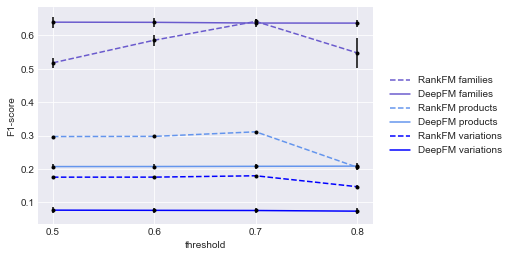

In [78]:
# f = plt.figure()
# f.set_figwidth(6)
# f.set_figheight(7)

RankFM_var_mean = np.mean(RankFM_var['10'], axis=0)
RankFM_var_std = np.std(RankFM_var['10'], axis=0)

RankFM_prod_mean = np.mean(RankFM_prod['10'], axis=0)
RankFM_prod_std = np.std(RankFM_prod['10'], axis=0)

RankFM_fam_mean = np.mean(RankFM_fam['10'], axis=0)
RankFM_fam_std = np.std(RankFM_fam['10'], axis=0)

Deep_FM_var_mean = DeepFM_var.iloc[:,0]
Deep_FM_var_std = DeepFM_var.iloc[:,1]
DeepFM_prod_mean = DeepFM_prod.iloc[:,0]
DeepFM_prod_std = DeepFM_prod.iloc[:,1]
DeepFM_fam_mean = DeepFM_fam.iloc[:,0]
DeepFM_fam_std = DeepFM_fam.iloc[:,1]

x = np.arange(0.5,0.9,0.1)

# plt.vlines(0.7, ymin=0.25, ymax=0.7, colors='red', ls='--', lw=2, label='optimal threshold')

plt.plot(x, RankFM_fam_mean, '--', c="slateblue", label = "RankFM families")
plt.errorbar(x, RankFM_fam_mean, yerr=RankFM_fam_std/np.sqrt(6), fmt='.k')

plt.plot(x, DeepFM_fam_mean, c="slateblue", label = "DeepFM families")
plt.errorbar(x, DeepFM_fam_mean, yerr=DeepFM_fam_std/np.sqrt(6), fmt='.k')

plt.plot(x, RankFM_prod_mean, '--', c="cornflowerblue", label = "RankFM products")
plt.errorbar(x, RankFM_prod_mean, yerr=RankFM_prod_std/np.sqrt(6), fmt='.k')

plt.plot(x, DeepFM_prod_mean, c="cornflowerblue", label = "DeepFM products")
plt.errorbar(x, DeepFM_prod_mean, yerr=DeepFM_prod_std/np.sqrt(6), fmt='.k')

plt.plot(x, RankFM_var_mean, '--', c="blue", label = "RankFM variations")
plt.errorbar(x, RankFM_var_mean, yerr=RankFM_var_std/np.sqrt(6), fmt='.k')

plt.plot(x, Deep_FM_var_mean, c="blue", label = "DeepFM variations")
plt.errorbar(x, Deep_FM_var_mean, yerr=Deep_FM_var_std/np.sqrt(6), fmt='.k')



plt.xticks(x)
plt.xlabel("threshold")
plt.ylabel("F1-score")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

